# Demonstrate Getting a Structure and Making an Image

This notebook will demonstrate getting a molecular structure here and rendering an image of it with PyMol.

Return to [the first page](index.ipynb) for the demonstration notebook [index](index.ipynb).

----


## Preparation

The intial parts to set up to send commands to PyMol are the same and so we'll define those as block of code we can prepend in front of special things to do.

In [1]:
init_block = '''#!/usr/bin/python

import sys, os

# pymol environment
moddir='/opt/pymol-svn/modules'
sys.path.insert(0, moddir)
os.environ['PYMOL_PATH'] = os.path.join(moddir, 'pymol/pymol_path')

# pymol launching: quiet (-q), without GUI (-c) and with arguments from command line
import pymol
pymol.pymol_argv = ['pymol','-qc'] + sys.argv[1:]
pymol.finish_launching()
cmd = pymol.cmd
'''

With a block of code defined that we can use within this running notebook, we can now step through each of the basic steps to get a structure and make an image using it with PyMol.

## Retrieving a structure

Let's define a command to get a structuure. The command to run, Pymol's `fetch` command, is between the outer quotes because for now we just want to define what we intend to run.

In [2]:
cmd2run = "cmd.fetch('1d66')"

Let's use the `init_block` now to combine it with the command to run and make a script to get a structure file.

In [3]:
script_txt = init_block + cmd2run
%store script_txt > script_f.py

Writing 'script_txt' (str) to file 'script_f.py'.


Let's run that script and get the structure.

In [4]:
!pymol -cq script_f.py

 ExecutiveLoad-Detail: Detected mmCIF


Let's see if that got the structure by running the next cell which shows the contents of that directory.

In [5]:
ls

1d66.cif  demo_fetch.ipynb  pymol_index.ipynb  script_f.py
1d66.png  environment.yml   README.md          script_fs.py
apt.txt   LICENSE           script_a.py        test_a.png


Note that `1d66.txt` is now among the list of files in the working directory.

## Making an image with the retrieved file

With a structure file in hand, we can use it to make an image.

The next few cells build on the example on the first notebook page to make an image. Mostly we are using the defaults for now.

In [6]:
cmds2run = '''cmd.zoom();cmd.load('1d66.cif')
cmd.png('1d66.png', 800, 800, dpi=300, ray=1)
'''

In [7]:
script_txt = init_block + cmds2run
%store script_txt > script_fs.py

Writing 'script_txt' (str) to file 'script_fs.py'.


In [8]:
!pymol -cq script_fs.py

 ExecutiveLoad-Detail: Detected mmCIF
 Ray: render time: 4.44 sec. = 810.0 frames/hour (4.44 sec. accum.).


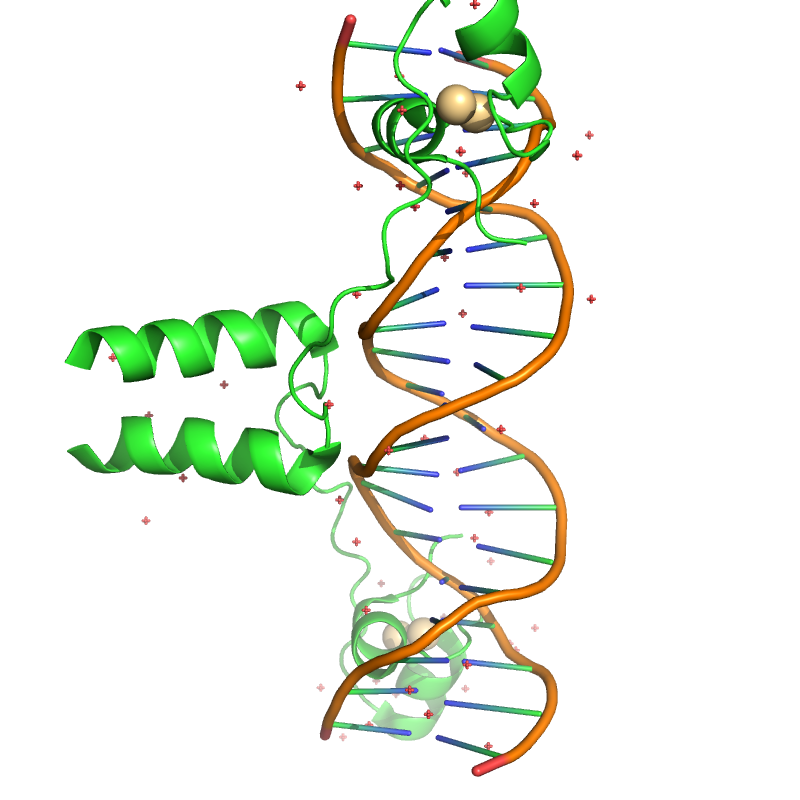

In [9]:
from IPython.display import Image
Image("1d66.png")

## Putting it all together and customizing

Note that the steps were done separately. It is possible to do all at once. And also begin to customize things.

Because we are in the Jupyter environment we can also save the step of saving the script to run and instead just pass the script in when calling on PyMol. This won't work if you are working on the command line in a terminal. However, it would work if you were using IPython's console.

See the [colors demo](demo_colors.py) for more on colors.

Let's look at the first few lines of the script to verify it was made:

In [ ]:
!head script_a.py

With an example script, we are ready to run it.  
The following will specify to run that script using PyMol. (Note that the exclamation point at the start is to tell the Jupyter environment to direct this to the shell. If you are running directly in a shell terminal, leave off the exclamation point.

In [ ]:
!pymol -cq script_a.py

That will say it rendered and image and we can prove that by displaying the result here by running the next cell.  
(Alternatively, the file browser here could be used to view the image.

In [ ]:
from IPython.display import Image
Image("test_a.png")